 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [2]:
# Convert files into DataFrames

Path.cwd()

file_path_appl = Path('./Resources/aapl_historical.csv')
file_path_algo = Path('./Resources/algo_returns.csv')
file_path_cost = Path('./Resources/cost_historical.csv')
file_path_goog = Path('./Resources/goog_historical.csv')
file_path_sp500 = Path('./Resources/sp500_history.csv')
file_path_whale = Path('./Resources/whale_returns.csv')

df = pd.read_csv(file_path_whale)
df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
# Convert other files into DataFrames

Path.cwd()

file_path_aapl = Path('./Resources/aapl_historical.csv')
file_path_cost = Path('./Resources/cost_historical.csv')
file_path_goog = Path('./Resources/goog_historical.csv')



aapl = pd.read_csv(file_path_aapl, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
cost = pd.read_csv(file_path_cost, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
goog = pd.read_csv(file_path_goog, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)



In [5]:
# Cleaning the data

# Sort ascending
goog.sort_index(inplace=True)
goog

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
whale = pd.read_csv(file_path_whale, parse_dates=True, index_col='Date', infer_datetime_format=True)

# Sort index
whale.sort_index()

whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [8]:
# Count nulls - 1 for each column except index (very first entry has Na because there is no growth rate that can be calculated.)
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [11]:
# Drop nulls
whale_clean = whale.dropna(inplace=False)
# Inplace=True returns a 'none' object.  If creating new variable, use inplace=False

# Nulls successfully dropped
print(whale_clean.isnull().sum())

whale_clean.head()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
# Reading algorithmic returns
algo = pd.read_csv(file_path_algo, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [14]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [17]:
# Drop nulls
algo.dropna(inplace=True)
# Inplace=True returns a none object; you cannot create a new variable

algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv(file_path_sp500, parse_dates=True, index_col='Date', infer_datetime_format=True)

# Sort chronologically by date
sp500_sorted = sp500.sort_index()

sp500_sorted

In [ ]:
# Check Data Types
sp500_sorted.dtypes

In [ ]:
# Fix Data Types

# Remove dollar sign
sp500_sorted['Close'] = sp500_sorted['Close'].str.replace('$', '')

print(sp500_sorted)
print(sp500_sorted.dtypes)


# Convert 'Close' object to float (Can an object be a string?)
sp500_test['Close'] = pd.to_numeric(sp500_test['Close'])

print(sp500_sorted.dtypes)

In [ ]:
# Calculate Daily Returns
sp500_pct = sp500_float.pct_change()
sp500_pct

In [ ]:
# Count nulls (1)
sp500_pct.isnull().sum()

# Drop nulls
sp500_pct.dropna(inplace=True)
sp500_pct

In [ ]:
# Rename Column

sp500_pct.columns
#sp500_pct.rename(columns={'Close': 'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_clean, algo], axis='columns', join='inner')

combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

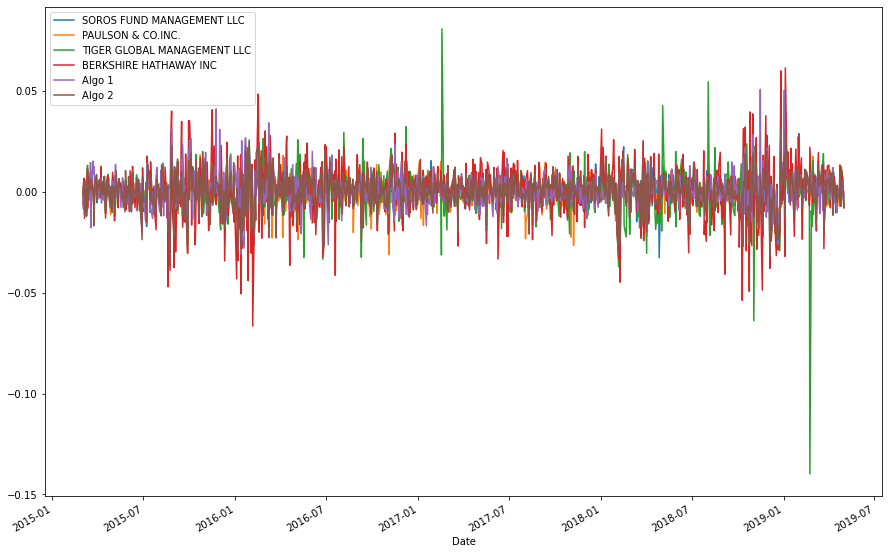

In [33]:
# Plot daily returns
combined_returns.plot(figsize=(15, 10))

In [ ]:
# Plot cumulative returns
# YOUR CODE HERE

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [ ]:
# Box plot to visually show risk
# YOUR CODE HERE

In [ ]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [ ]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [ ]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

In [ ]:
# Construct a correlation table
# YOUR CODE HERE

In [ ]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

In [ ]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [ ]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE